In [22]:
import yfinance as yf

tickers = ["BTC-USD", "ETH-USD", "SOL-USD"]
df = yf.download(tickers, period="1y")["Close"]
df.head()

/var/folders/39/s6b7fbds4wd_zd9s7nj9lrqh0000gn/T/ipykernel_40226/505814341.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, period="1y")["Close"]
[*********************100%***********************]  3 of 3 completed


Ticker,BTC-USD,ETH-USD,SOL-USD
Date,,,
2025-01-08,95043.523438,3326.329346,197.559052
2025-01-09,92484.039062,3219.430664,185.025284
2025-01-10,94701.453125,3267.489990,187.579178
2025-01-11,94566.593750,3282.217773,187.995514
2025-01-12,94488.437500,3265.951172,188.560379


In [23]:
import numpy as np
# Log-Renditen berechnen
log_returns = np.log(df / df.shift(1)).dropna()

# Depotgewichtung definieren
weights = np.array([0.5, 0.4, 0.1])  # BTC, ETH, SOL

# Schritt 4: Portfolio-Renditen berechnen
portfolio_returns = log_returns @ weights
portfolio_returns.head()

Date
2025-01-09   -0.033270
2025-01-10    0.019145
2025-01-11    0.001308
2025-01-12   -0.002101
2025-01-13   -0.019240
dtype: float64

In [24]:
import sys
import os
sys.path.append(os.path.abspath("../"))

In [25]:
from src.simulate_var import simulate_var

1–Tages–VaR (99%): -839.47 €
Standardfehler: ±0.00 €
95%–Konfidenzintervall: [-839.47, -839.47] €


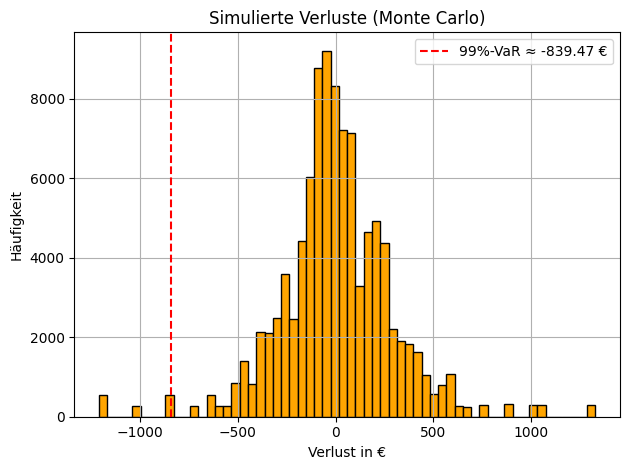

In [26]:

os.makedirs("../reports", exist_ok=True)
os.makedirs("../figures", exist_ok=True)

VaR, se, ci = simulate_var(portfolio_returns.values, investment=10000, save_plot=True)

print(f"1–Tages–VaR (99%): {VaR:.2f} €")
print(f"Standardfehler: ±{se:.2f} €")
print(f"95%–Konfidenzintervall: [{ci[0]:.2f}, {ci[1]:.2f}] €")